In [13]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt

## 1D wavefield

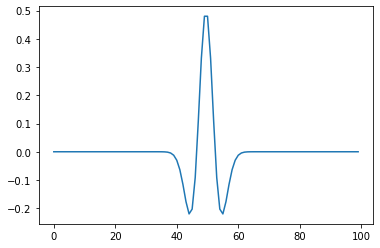

In [20]:
points = 100
a = 3.0
wave = signal.ricker(points, a) # (Number of points, Width)
wave = np.array(wave, dtype=np.float32)
plt.plot(wave)
plt.show()

#### Make Model

In [42]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(1,))
x = layers.Dense(128, activation='relu')(inputs)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dense(1024, activation='relu')(x)
outputs = layers.Dense(1)(x)

model = keras.Model(inputs=inputs, outputs=outputs)

#### Prepare data

In [43]:
train_data = np.arange(points) / points
train_labels = wave

#### Training

In [53]:
model.compile(optimizer="adam",
    loss="MSE",
    metrics=["accuracy"])
model.fit(train_data, train_labels, epochs=400, batch_size=64, verbose=0)

#### Inferencing

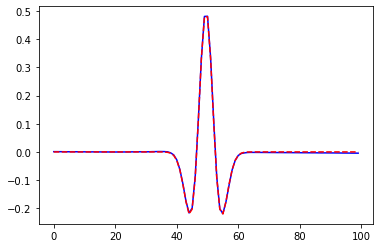

In [54]:
sample = train_data
wave_pred = model.predict(sample)
plt.plot(wave_pred, 'b')
plt.plot(wave, 'r--')
plt.show()

#### Interepolation !

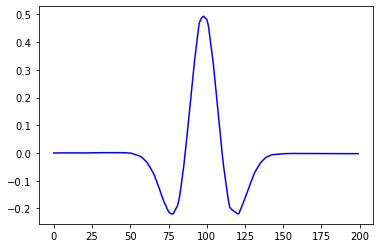

In [56]:
npoints = 400 
fine_samples = np.arange(npoints) / npoints
fine_samples = fine_samples[100:300]
wave_pred2 = model.predict(fine_samples)
plt.plot(wave_pred2, 'b')
plt.show()

## 2D Wavefield

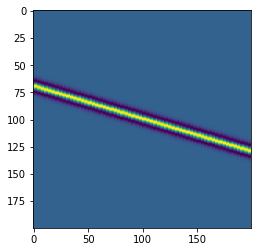

In [94]:
points=100
a = 3.0
wave_1d = signal.ricker(points, a) # (Number of points, Width)

n_times = 200
n_offsets = 200
wave_2d = np.zeros((n_times, n_offsets))
slope = 0.3             
t0 = 20

for j in range(n_offsets):
    for i in range(points):
        wave_2d[i + t0 + int(slope*j),j] = wave_1d[i] 

#wave_2d = np.array(wave, dtype=np.float32)
plt.imshow(wave_2d)

In [166]:
inputs = keras.Input(shape=(2,))
x = layers.Dense(256, activation='relu')(inputs)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dense(1024, activation='relu')(x)
outputs = layers.Dense(1)(x)

model2 = keras.Model(inputs=inputs, outputs=outputs)
model2.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense_35 (Dense)            (None, 256)               768       
                                                                 
 dense_36 (Dense)            (None, 512)               131584    
                                                                 
 dense_37 (Dense)            (None, 1024)              525312    
                                                                 
 dense_38 (Dense)            (None, 1024)              1049600   
                                                                 
 dense_39 (Dense)            (None, 1)                 1025      
                                                                 
Total params: 1,708,289
Trainable params: 1,708,289
Non-tra

In [235]:
t = np.arange(n_times) / n_times
x = np.arange(n_offsets) / n_offsets
T, X = np.meshgrid(t, x)
train_data = np.dstack((T,X))
train_data = np.reshape(train_data,[-1,2])
train_labels = np.reshape(wave_2d,[-1,1])

In [236]:
T.shape, X.shape, train_data.shape, train_labels.shape

((200, 200), (200, 200), (40000, 2))

In [237]:
T[0,0], T[0,1], X[0,0], X[0,1], train_data[0], train_data[1]

(0.0, 0.005, 0.0, 0.0, array([0., 0.]), array([0.005, 0.   ]))

In [239]:
model2.compile(optimizer="adam",
    loss="MSE",
    metrics=["accuracy"])
model2.fit(train_data, train_labels, epochs=500, batch_size=512, verbose=0)

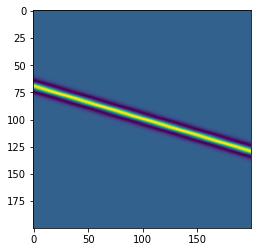

In [240]:
sample = train_data
wave2d_pred = model2.predict(sample)
plt.imshow(wave2d_pred.reshape((n_times, n_offsets)))

In [241]:
max(wave2d_pred), min(wave2d_pred)

(array([0.47559342], dtype=float32), array([-0.21579967], dtype=float32))